# Práctica 4. Errores y Ataques en Redes

Autor: Tania Ivonne Rueda Fujiwara

En esta práctica se busca que el alumno aprenda a hacer uso de las librerias de NetworkX y de Matplotlib para: 

• Implementar un modelo de errores secuenciales en Python.

• Implementar un modelo de ataques dirigidos en Python.

• Reconocer las diferencias de tolerancia a errores en redes de escala libre y aleatorias.

• Reconocer las diferencias de tolerancia a ataques en redes de escala libre y aleatorias.

## Importamos librerías a utilizar

In [15]:
#Para crear y análizar redes
import networkx as nx
#Para dibujar redes y graficar funciones
import matplotlib.pyplot as plt
#Para generar errores aleatorios
import random

## Creación de Distintas redes

#### Creamos una red aleatoria de 1000 nodos y probabilidad de conexión de 0.06 

In [3]:
redAleatoria = nx.erdos_renyi_graph(1000, 0.06)

#### Creamos una red de escala libre con 1000 nodos y 14 enlaces por cada nuevo nodo agregado a la red (Algoritmo Barabsi-Albert n=1000, 14)

In [4]:
redEscalaLibre = nx.barabasi_albert_graph(1000, 14)

## Funcion para gráficar

#### Funcion que grafica dos funciones en una misma gráfica.

In [5]:
def grafica_funciones(titulo, f1_valores, f2_valores, ejex, f1_leyenda, f2_leyenda, ejex_etiqueta, ejey_etiqueta):
    plt.title(titulo)
    if ejex == None:
        plt.plot(f1_valores, label=f1_leyenda)  
        plt.plot(f2_valores, label=f2_leyenda)
    else:
        plt.plot(ejex,f1_valores, label=f1_leyenda)  
        plt.plot(ejex,f2_valores, label=f2_leyenda)
    plt.xlabel(ejex_etiqueta)
    plt.ylabel(ejey_etiqueta)
    plt.legend()

## Distribución de Grados

In [6]:
#En la Variable dist_redAleatoria se calcula la distribución de grados de una red aleatoria
dist_redAleatoria = nx.degree_histogram(redAleatoria)

#En la Variable dist_redEscalaLibre se calcula la distribución de grados de una red de escala libre
dist_redEscalaLibre = nx.degree_histogram(redEscalaLibre)

#### Distribución de grados normalizada

In [7]:
#En distr_norm_rAleatoria y distr_norm_rEscalaLibre se calcula la distribución nomalizada de la red aleatoria y de la red
#de escala libre
distr_norm_rAleatoria = [cant_nodos/len(redAleatoria) for cant_nodos in dist_redAleatoria]
distr_norm_rEscalaLibre = [cant_nodos/len(redEscalaLibre) for cant_nodos in dist_redEscalaLibre]

### Graficamos las distribuciones normalizadas, de tal forma que se muestren en una sola imagen

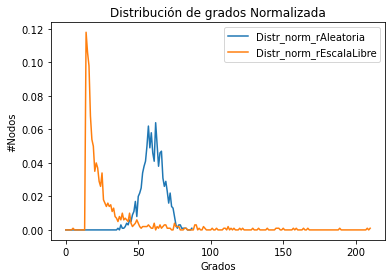

In [8]:
titulo = "Distribución de grados Normalizada"
f1_valores = distr_norm_rAleatoria
f2_valores = distr_norm_rEscalaLibre
ejex = None
f1_leyenda = "Distr_norm_rAleatoria"
f2_leyenda = "Distr_norm_rEscalaLibre"
ejex_etiqueta = "Grados"
ejey_etiqueta = "#Nodos"
grafica_funciones(titulo, f1_valores, f2_valores, ejex, f1_leyenda, f2_leyenda, ejex_etiqueta, ejey_etiqueta)

## Funciones para calcular metricas de robustez

#### Calcular el número de componentes conectados

In [9]:
#Recibe una red (G) y devuelve un número (num_cc) el cual indica el número de componentes conectados de la red. 
def num_componentes_conectados(G):
    num_cc = nx.number_connected_components(G)
    return(num_cc)
pass

#### Calcular la proporción del componente gigante con respecto al tamaño de la red original

In [10]:
#Recibe una red (G) y un entero (n) que denota el número de nodos en G. 
#Devuelve un numero (prop_gc) que indica la proporción del componente gigante con respecto a n.
def prop_componente_gigante(G,n):
    gigante_cc = max(nx.connected_components(G), key=len)
    orden_gigante = len(gigante_cc)
    prop_gc = orden_gigante/n
    return(prop_gc)
pass

#### Calcular el tamaño del componente gigante de una red

In [11]:
def tam_componente_gigante(G,n):
    gigante_cc = max(nx.connected_components(G), key=len)
    orden_gigante = len(gigante_cc)
    return(orden_gigante)
pass

## Funciones para generar ERRORES

### Un error consiste en eliminar una nodo de la red aleatoreamente. Se deben crear las siguientes funciones

#### 1) error - Recibe una red G, elimina un nodo i aleatoreamente y devuelve la nueva red G (sin el nodo i)

In [17]:
def error(G):
    #Guarda los nodos en un arreglo
    nodos = G.nodes()
    #Elige al azar un nodo
    nodo_fallido = random.choice(list(nodos))
    #Remueve el nodo elegido
    G.remove_node(nodo_fallido)
    #Devuelve el grafo con el nodo ya removido
    return G

#### 2) errores_secuenciales - Recibe una red G y un entero "num_errores" que indica la cantidad de errores que ocurrirán en la red. Secuencialmente llama "num_errores" veces a la función error.

Devuleve dos listas una con las cantidadres de componentes de la red y la otra con los tamaños del componente gigante

In [13]:
def errores_secuenciales(G,num_errores):
    cc_lista = list()
    gc_lista = list()
    for i in range(num_errores):
        G = error(G)
        num_cc = num_componentes_conectados(G)
        tam_cg = tam_componente_gigante(G,len(G))
        cc_lista.append(num_cc)
        gc_lista.append(tam_cg)
    return (cc_lista, gc_lista)

## Ejecución de errores secuenciales a la red

### Simulamos errores secuenciales en ambas redes, desde 1 hasta 999 errores.

In [18]:
copia_rAleatoria = redAleatoria.copy()
tam_original_rAleatoria = len(copia_rAleatoria) 
(num_comp_rAleatoria, tam_compGigante_rAleatoria) = errores_secuenciales(copia_rAleatoria, 999)

prop_CompGigante_rAleatoria = list()
aux = 0
for i in tam_compGigante_rAleatoria:
    aux += 1
    prop_CompGigante_rAleatoria.append(i/(tam_original_rAleatoria-aux))

copia_rEscalaLibre = redEscalaLibre.copy()
tam_original_rEscalaLibre = len(copia_rEscalaLibre)
(num_comp_rEscalaLibre, tam_compGigante_rEscalaLibre) = errores_secuenciales(copia_rEscalaLibre, 999)

prop_CompGigante_rEscalaLibre = list()
aux = 0
for i in tam_compGigante_rEscalaLibre:
    aux += 1
    prop_CompGigante_rEscalaLibre.append(i/(tam_original_rEscalaLibre-aux))

#### Observamos como se grafica el número de componentes conectados vs. la cantidad de errores, para ambas redes.

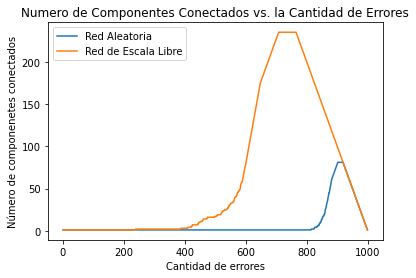

In [47]:
titulo = "Numero de Componentes Conectados vs. la Cantidad de Errores"
f1_valores = num_comp_rAleatoria
f2_valores = num_comp_rEscalaLibre
ejex = None
f1_leyenda = "Red Aleatoria"
f2_leyenda = "Red de Escala Libre"
ejex_etiqueta = "Cantidad de errores"
ejey_etiqueta = "Número de componenetes conectados"
grafica_funciones(titulo, f1_valores, f2_valores, ejex, f1_leyenda, f2_leyenda, ejex_etiqueta, ejey_etiqueta)
plt.savefig("NumCC_vs_CantErrores.png")

#### Observamos como se grafica la proporción del componente gigante vs. la cantidad de errores, para ambas redes.

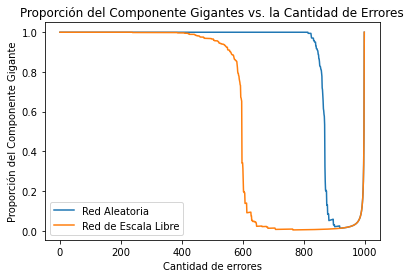

In [48]:
titulo = "Proporción del Componente Gigantes vs. la Cantidad de Errores"
f1_valores = prop_CompGigante_rAleatoria
f2_valores = prop_CompGigante_rEscalaLibre
ejex = None
f1_leyenda = "Red Aleatoria"
f2_leyenda = "Red de Escala Libre"
ejex_etiqueta = "Cantidad de errores"
ejey_etiqueta = "Proporción del Componente Gigante"
grafica_funciones(titulo, f1_valores, f2_valores, ejex, f1_leyenda, f2_leyenda, ejex_etiqueta, ejey_etiqueta)
plt.savefig("PropCG_vs_CantErrores.png")

## Funciones para generar ATAQUES

#### Un ataque se genera cuando el nodo de mayor grado es eliminado de la red. 

#### Se calcula cual es el nodo con mayor grado

In [21]:
#Recibe una red y devuelve el nodo con el mayor grado
def nodo_mayor_grado(red):
    grado_más_alto = 0
    nodo_mayor_grado = None
    for nodo in red.nodes():
        if(red.degree(nodo) >= grado_más_alto):
            grado_más_alto = red.degree(nodo)
            nodo_mayor_grado = nodo
    return(nodo_mayor_grado)
pass

#### Se genera un ataque 

In [25]:
#Recibe una red, elimina el nodo con el mayor grado y devuelve la nueva red pero sin el nodo eliminado 
def unAtaque(red):
    nodo_a_eliminar = nodo_mayor_grado(red)
    red.remove_node(nodo_a_eliminar)
    return(red)
pass

#### Se generan ataques secuenciales

In [31]:
#Recibe una red y un número entero numAtaques como el numero de ataques que tendra la red, 
#devuelve la red sin los nodos que fueron atacados
def ataquesSecuenciales(red, numAtaques):
    lista_cantComp = list()
    lista_compGigante = list()
    for i in range(numAtaques):
        red = unAtaque(red)
        num_cc = num_componentes_conectados(red)
        tam_cg = tam_componente_gigante(red,len(red))
        lista_cantComp.append(num_cc)
        lista_compGigante.append(tam_cg)
    return(lista_cantComp,lista_compGigante)
pass

## Ejecución de ataques secuenciales a la red

### Simulamos ataques secuenciales en ambas redes, desde 1 hasta 999 errores

In [32]:
copia_rAleatoria = redAleatoria.copy()
tam_original_rAleatoria = len(copia_rAleatoria) 
(num_comp_rAleatoria, tam_compGigante_rAleatoria) = ataquesSecuenciales(copia_rAleatoria, 999)

prop_CompGigante_rAleatoria = list()
aux = 0
for i in tam_compGigante_rAleatoria:
    aux += 1
    prop_CompGigante_rAleatoria.append(i/(tam_original_rAleatoria-aux))

copia_rEscalaLibre = redEscalaLibre.copy()
tam_original_rEscalaLibre = len(copia_rEscalaLibre)
(num_comp_rEscalaLibre, tam_compGigante_rEscalaLibre) = ataquesSecuenciales(copia_rEscalaLibre, 999)

prop_CompGigante_rEscalaLibre = list()
aux = 0
for i in tam_compGigante_rEscalaLibre:
    aux += 1
    prop_CompGigante_rEscalaLibre.append(i/(tam_original_rEscalaLibre-aux))

#### Observamos como se grafica el número de componentes conectados vs. la cantidad de ataques, para ambas redes.

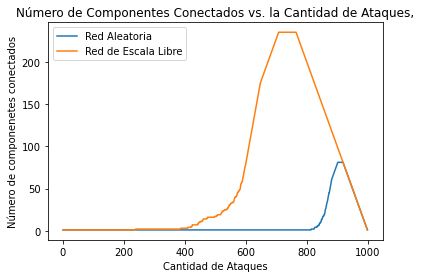

In [49]:
titulo = "Número de Componentes Conectados vs. la Cantidad de Ataques,"
f1_valores = num_comp_rAleatoria
f2_valores = num_comp_rEscalaLibre
ejex = None
f1_leyenda = "Red Aleatoria"
f2_leyenda = "Red de Escala Libre"
ejex_etiqueta = "Cantidad de Ataques"
ejey_etiqueta = "Número de componenetes conectados"
grafica_funciones(titulo, f1_valores, f2_valores, ejex, f1_leyenda, f2_leyenda, ejex_etiqueta, ejey_etiqueta)
plt.savefig("NumCC_vs_CantAtaques.png")

#### Observamos como se grafica la proporción del componente gigante vs. la cantidad de ataques, para ambas redes.

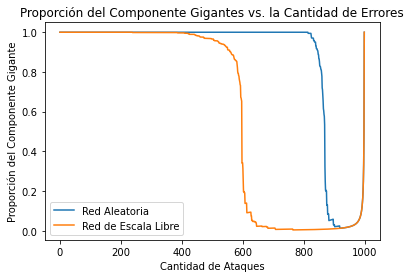

In [51]:
titulo = "Proporción del Componente Gigantes vs. la Cantidad de Errores"
f1_valores = prop_CompGigante_rAleatoria
f2_valores = prop_CompGigante_rEscalaLibre
ejex = None
f1_leyenda = "Red Aleatoria"
f2_leyenda = "Red de Escala Libre"
ejex_etiqueta = "Cantidad de Ataques"
ejey_etiqueta = "Proporción del Componente Gigante"
grafica_funciones(titulo, f1_valores, f2_valores, ejex, f1_leyenda, f2_leyenda, ejex_etiqueta, ejey_etiqueta)
plt.savefig("PropCG_vs_CantAtaques.png")